# การจัดกลุ่ม Pokemon

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
df =  pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### # : ID ของโปเกมอนแต่ละตัว
#### Name : ชื่อโปเกมอนแต่ละตัว
#### Type 1 : ประเภทความต้านทานการโจมตี
#### Type 2 : ประเภทความต้านทานการโจมตี ประเภทที่ 2
#### Total : พลังรวม
#### HP :  พลังชีวิต
#### Attack : พลังการโจมตีพื้นฐาน
#### Defense : พลังป้องกันพื้นฐาน
#### SP Atk : พลังการโจมตีพิเศษ
#### SP Def : พลังการป้องพิเศษ
#### Speed : ความเร็ว

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**ตรวจสอบข้อมูลเบื้องต้น**

In [6]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Type 2(ประเภทความต้านทานการโจมตี ประเภทที่ 2) มีค่าว่าง 386 ค่า เกือบครึ่งของจำนวนข้อมูล**

In [7]:
df.drop('Type 2' , axis=1 , inplace=True)

**นำ Type 2 ออกจากข้อมูล**

In [8]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='count', ylabel='Type 1'>

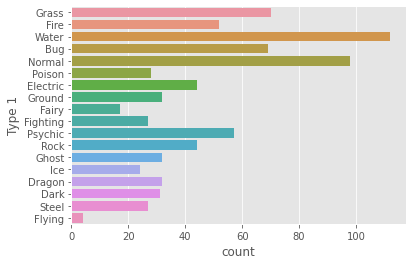

In [9]:
sns.countplot(y=df['Type 1'])

**จำนวนของ pokemon แต่ละประเภท ตามความต้านทานการโจมตี**

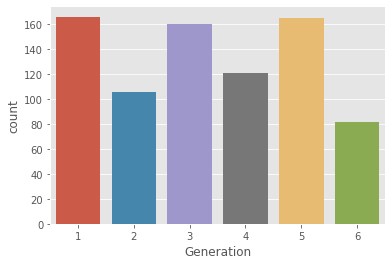

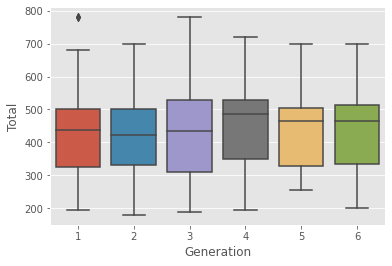

In [10]:
sns.countplot(df['Generation'])
plt.show()
sns.boxplot(data=df , x='Generation' , y='Total')
plt.show()

**จำนวนรุ่นของ pokemon และ ค่าพลังรวมของแต่ละรุ่น**

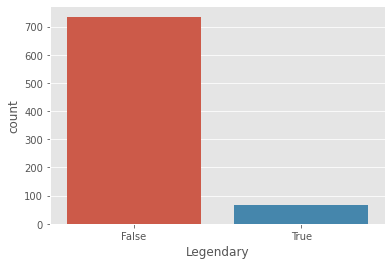

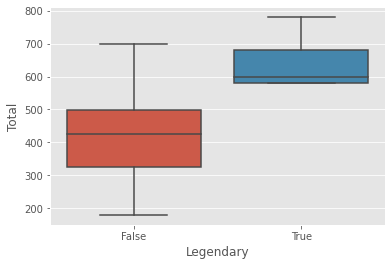

In [11]:
sns.countplot(df['Legendary'])
plt.show()
sns.boxplot(data=df , x='Legendary' , y='Total')
plt.show()

**จำนวน pokemon ที่เป็นตัวธรรมดากับตัวพิเศษ และ ค่าพลังรวม**

Text(0.5, 1.0, 'Total')

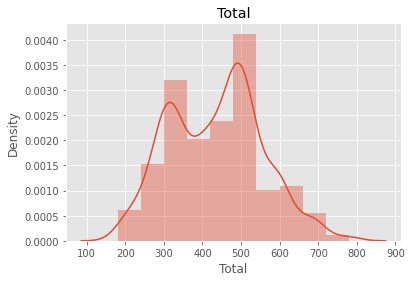

In [12]:
sns.distplot(df['Total'] , bins=10 )
plt.title('Total')

**การกระจายตัวของค่าพลังรวม**

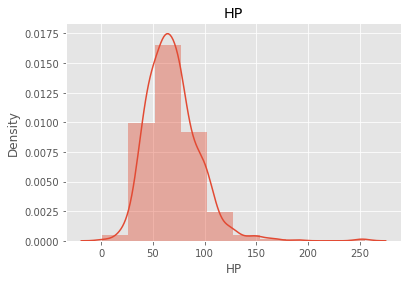

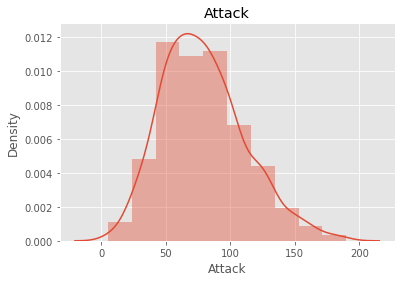

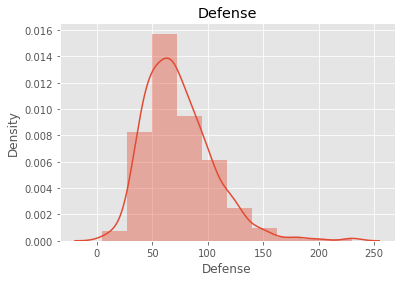

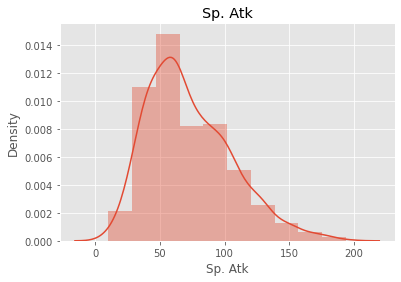

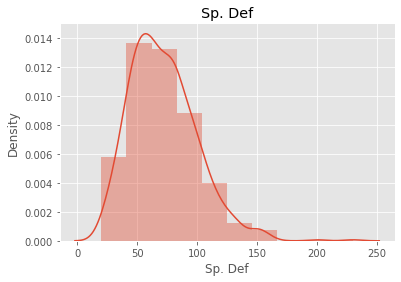

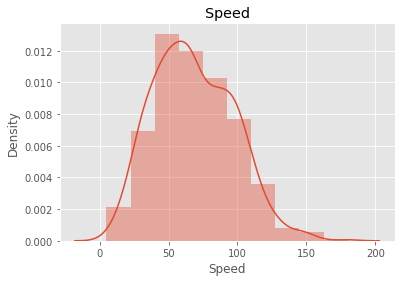

In [13]:
for i in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'] :
    sns.distplot(df[i] , bins=10)
    plt.title(i)
    plt.show()

**การกระจายตัวของค่าในแต่ละคุณสมบัติ**

Text(0.5, 1.0, 'Total')

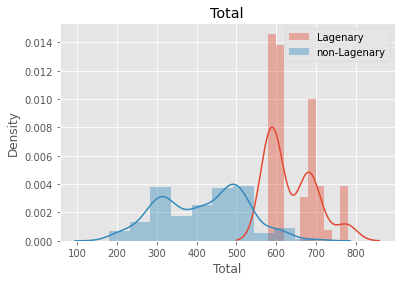

In [14]:
sns.distplot(df[df['Legendary'] ==True]['Total'] , bins=10 , label='Lagenary' )
sns.distplot(df[df['Legendary'] ==False]['Total'] , bins=10 , label='non-Lagenary')
plt.legend()
plt.title('Total')

**การกระจายตัวของค่าพลัง ระหว่างตัวธรรมดากับตัวพิเศษ**

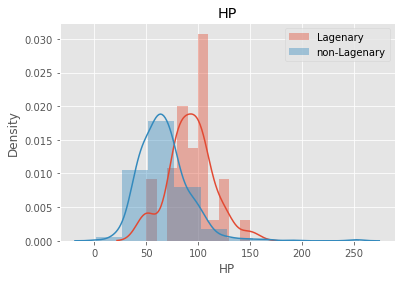

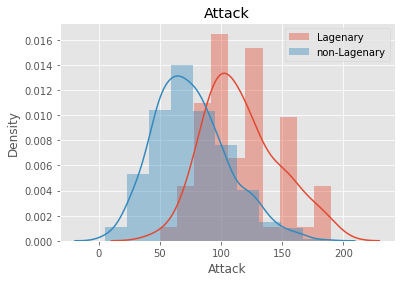

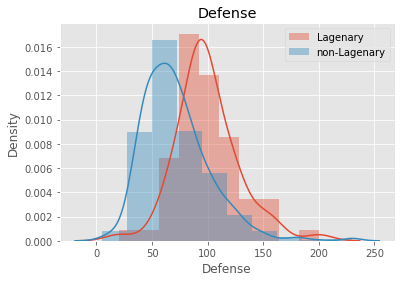

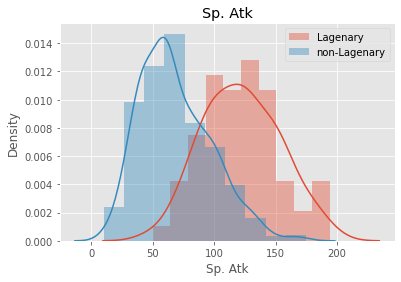

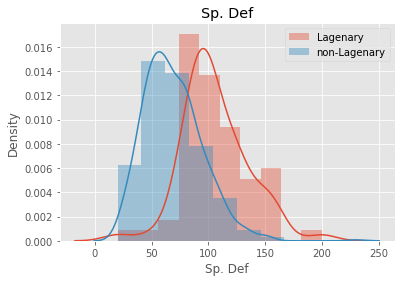

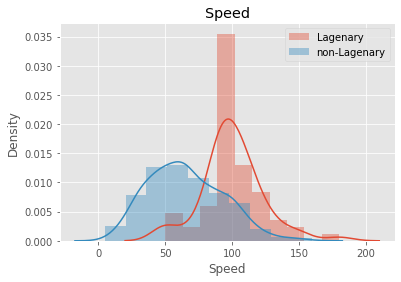

In [15]:
for i in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'] :
    sns.distplot(df[df['Legendary'] ==True][i] , bins=10 , label='Lagenary' )
    sns.distplot(df[df['Legendary'] ==False][i] , bins=10 , label='non-Lagenary')
    plt.legend()
    plt.title(i)
    plt.show()

**การกระจายตัวของค่าในแต่ละคุณสมบัติ ระหว่างตัวธรรมดากับตัวพิเศษ**

In [16]:
df_dum = df.copy()

In [17]:
df_dum.drop(['#' , 'Name','Total' ,'Generation','Legendary'] , axis=1 , inplace=True)
df_dum.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65


**เตรียมข้อมูลเพื่อการจัดกลุ่ม**

In [18]:
df_dum = pd.concat([df_dum,df_dum['Type 1'].str.get_dummies()] , axis=1)
df_dum = df_dum.drop('Type 1' , axis=1)
df_dum.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,Electric,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,45,49,49,65,65,45,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
scler = StandardScaler()

In [20]:
df_dum = scler.fit_transform(df_dum)

**ปรับข้อมูลให้อยู่ในช่วงที่ใกล้เคียงกัน**

In [21]:
pca = PCA(n_components=2)

In [22]:
df_dum = pca.fit_transform(df_dum)

In [23]:
lis_iner = []

for i in range(1,10) :
    km = KMeans(n_clusters=i)
    km.fit(df_dum)
    lis_iner.append(km.inertia_)

Text(0, 0.5, 'inertia')

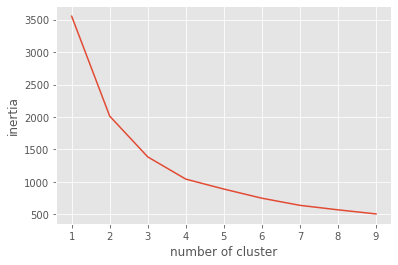

In [24]:
plt.plot(np.arange(1,10) , lis_iner , '-')
plt.xlabel('number of cluster')
plt.ylabel('inertia')

**หาจำนวนกลุ่มที่เหมาะสม จากภาพ Elbow(จุดหักศอก) คือ 4 หมายความว่า กลุ่มที่เหมาะสมคือ 4 กลุ่ม**

In [25]:
km = KMeans(n_clusters=4)

In [26]:
km.fit(df_dum)

KMeans(n_clusters=4)

In [27]:
km.cluster_centers_

array([[ 0.54731609,  2.3765591 ],
       [ 0.47046935, -0.41173982],
       [-1.80838883, -0.17232325],
       [ 2.69457903, -0.65416883]])

**จุดศูนย์กลางของ 4 กลุ่ม**

<AxesSubplot:>

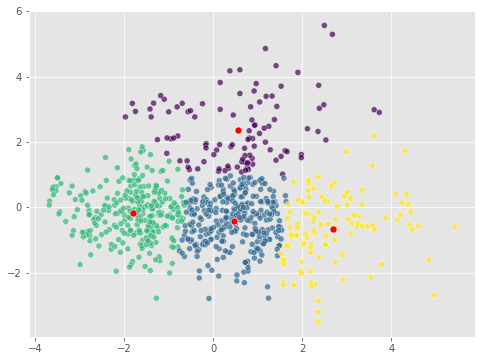

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_dum[:,0] , df_dum[:,1] , c=km.predict(df_dum) , alpha=0.7)
sns.scatterplot(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , color='r' , s=50)

**แบ่งข้อมูลได้ 4 กลุ่มตามสี ซึ่งจุดสีแดงหมายถึงจุดศูนย์กลางของแต่ละกลุ่ม**

In [29]:
df['cluster'] = km.predict(df_dum)

<AxesSubplot:xlabel='cluster', ylabel='count'>

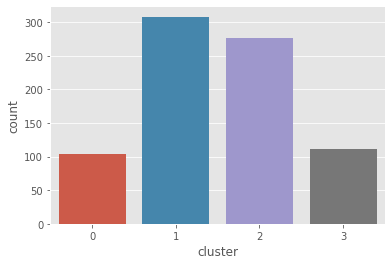

In [30]:
sns.countplot(df['cluster'])

**จำนวน pokemon ในแต่ละกลุ่ม**

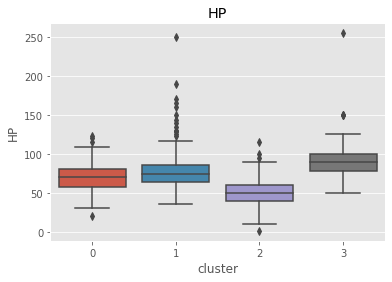

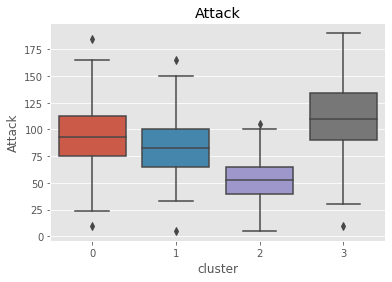

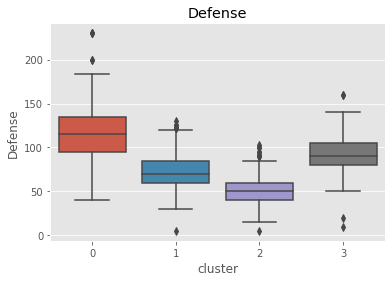

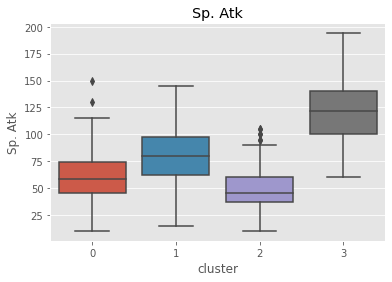

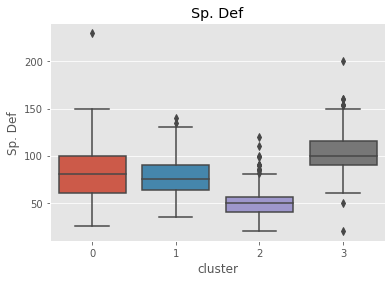

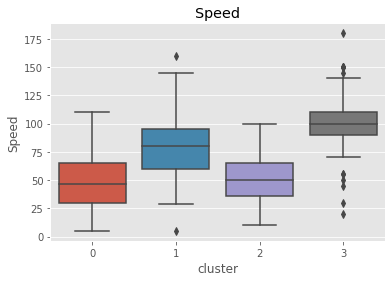

In [31]:
for i in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'] :
    sns.boxplot(data=df , x='cluster' , y=i)
    plt.title(i)
    plt.show()

**ช่วงของค่าในแต่ละคุณสมบัติ ของ pokemon แต่ละกลุ่ม**